In [2]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# okpy config
from client.api.notebook import Notebook
ok = Notebook('music-final-project.ok')
_ = ok.auth(inline=True)

Assignment: Final Project: Free Music Archive
OK, version v1.12.5


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: F5lg26zxo71CWpkdcKAQTpT2LWZqUL
Successfully logged in as tarususu.t3@berkeley.edu


# Free Music Archive: A Dataset For Music Analysis

This dataset was introduced by Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, and Xavier Bresson at the International Society for Music Information Retrieval (MIR) Conference in 2017.
It has been cleaned for your convenience: all missing values have been removed, and low-quality observations and variables have been filtered out. A brief summary of the dataset, originally
given at the conference, is provided below. 

**NB: You may not copy any public analyses of this dataset. Doing so will result in a zero.**

## Summary

>We introduce the Free Music Archive (FMA), an open and easily accessible dataset suitable for evaluating several tasks in MIR, a field concerned with browsing, searching, and
organizing large music collections. The community's growing interest in feature and end-to-end learning is however restrained by the limited availability of large audio datasets.
The FMA aims to overcome this hurdle by providing 917 GiB and 343 days of Creative Commons-licensed audio from 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a
hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text
such as biographies.

A small, random subset of this larger dataset is provided to you.

## Data Description

This dataset consists of three tables stored in the `data` folder:
1. `tracks` provides information on individual tracks.
2. `genres` contains information on all of the genres.
3. `features` contains information on the Spotify audio features of each track.

A description of each table's variables is provided below:

`tracks`:
* `track_id`: a unique ID for each track
* `track_title`: title of each track
* `artist_name`: name of the artist
* `album_title`: title of the album that the track comes from
* `track_duration`: the length of the song in seconds
* `track_genre`: the genre(s) that the track fall(s) into
* `album_date_released`: a string indicating the album release date
* `album_type`: specifies whether the album is studio-recorded, live, or from a radio program
* `album_tracks`: number of tracks on the album

`genres`:
* `genre_id`: a unique ID for each genre
* `title`: the name of the genre
* `# tracks`: the number of tracks that fall into this genre
* `parent`: the genre that this subgenre falls under (will be 0 if not a subgenre)

`features` (descriptions from the [Spotify API page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)):
* `track_id`: a unique ID for each track
* `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* `instrumentalness`: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
* `liveness	`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
* `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* `valence`: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can tackled with this data. Here are a few ideas to get
you started:


1. Which genre has the longest songs?
3. Is there a relationship between danceability and energy? What about danceability and valence?
4. Can you classify which genre (of [pick 2 once we see data]) based on its features?
5. Do (pick 2 genres or parent genres) have the same average energy?

Don't forget to review the [Final Project Guidelines](https://docs.google.com/document/d/1NuHDYTdWGwhPNRov8Y3I8y6R7Rbyf-WDOfQwovD-gmw/edit?usp=sharing) for a complete list of requirements.

## Preview

The tables are loaded in the code cells below. Take some time to explore them!

In [3]:
#load genres
genres = Table().read_table("data/genres_final.csv")
genres

genre_id,title,#tracks,parent
1,Avant-Garde,8693,38
2,International,5271,0
3,Blues,1752,0
4,Jazz,4126,0
5,Classical,4106,0
6,Novelty,914,38
7,Comedy,217,20
8,Old-Time / Historic,868,0
9,Country,1987,0
10,Pop,13845,0


In [4]:
#load features
features = Table().read_table("data/features_final.csv")
features

track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
145,0.235506,0.438672,0.487752,0.716122,0.0703593,0.0472978,120.79,0.650452
155,0.981657,0.142249,0.912122,0.967294,0.36351,0.087527,91.912,0.0343253
201,0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632
307,0.77377,0.552026,0.251328,0.568976,0.110743,0.0506326,117.247,0.356984
309,0.335481,0.390263,0.0210674,0.937508,0.0890457,0.0414906,60.382,0.0399321
319,0.890498,0.316413,0.0596131,0.913303,0.108808,0.0387785,133.934,0.122417
327,0.928171,0.553091,0.303937,0.95423,0.110752,0.107401,110.039,0.616368
328,0.297541,0.624953,0.176884,0.815871,0.0928226,0.0551486,114.858,0.503635
350,0.989664,0.463938,0.363612,0.919011,0.11874,0.0376218,99.384,0.591003
364,0.98638,0.61286,0.15611,0.104549,0.107289,0.198543,109.256,0.483544


In [5]:
#load tracks
tracks = Table().read_table("data/tracks_final.csv")
tracks

track_id,track_title,artist_name,album_title,track_duration,track_genre,album_date_released,album_type,album_tracks
145,Amoebiasis,Amoebic Ensemble,Amoebiasis,326,Jazz,2009-01-06,Album,0
155,Maps of the Stars Homes,Arc and Sender,unreleased demo,756,Rock,2009-01-06,Single Tracks,1
201,Big City,Ed Askew,What I Know,210,Folk,2009-01-07,Album,10
307,Out on the farm,Blah Blah Blah,Green Collection,205,Rock,2007-09-01,Album,0
309,Where are all the people,Blah Blah Blah,Green Collection,229,Rock,2007-09-01,Album,0
319,Complete Shakespeare,Blah Blah Blah,Green Collection,156,Rock,2007-09-01,Album,0
327,Hands Beckoning,Blah Blah Blah,Stripey Collection,259,Rock,1982-04-06,Album,0
328,Central Park,Blah Blah Blah,Stripey Collection,236,Rock,1982-04-06,Album,0
350,Gotta Go,Blah Blah Blah,30th Anniversary Blah Blah Blah,101,Rock,2009-01-01,Album,21
364,Sunspot activity,Blah Blah Blah,30th Anniversary Blah Blah Blah,152,Rock,2009-01-01,Album,21


<br>

# Research Report

## Introduction

For our final project, we analyzed the Free Music Archive data. The dataset was first introduced at the 2017’s Music Information Retrieval (MIR) Conference; it examines the search, gathering, and organization of music collections. The FMA was created in response to the recent call for an amassing of information on features and potential end-to-end learning for today’s ever growing music industry/media platforms. A randomized subset of the FMA was provided in three tables: tracks, genres, and features.

The first dataset, `tracks`, provides information on individual tracks’ biographical information. It lists each tracks’ distinct ID, title, artist, album, length (in seconds), genre(s), and release date. Additionally, the table gives the type and number of tracks in album information for each track, including the type and number of tracks.

The second dataset is `genres`, which gives a general overview of different genres. Each genre has a different ID, number of tracks, and a descriptor number for its parent genre. A parent genre is exactly as it sounds, a genre that each of the subgenre falls under. The parent genre is 0 if the genre is not a subgenre.

Lastly and most important to our report, the `features` dataset provides eight numeric measures to describe each track. Each measure describes a track based on different factors on a scale of 0 to 1, including danceability, acousticness, energy, instrumentalness, liveness, speechiness, tempo, and valence. *Spotify*, a major music streaming platform, also uses these features to characterize its many tracks. Most of the names reflect the characteristics a feature is a measure of, like tempo for example. However, some reflect combined factors into one, like danceability. This measure takes tempo, beat strength, rhythm stability, and overall regularity into account. Together, features help to distinguish tracks from one another.

## Hypothesis Testing and Prediction Questions

**Please bold your hypothesis testing and prediction questions.**

Our research report centers around the Electronic genre. Electronic music is any music that primarily involves electronic instruments and processing. One of the most well-known types of Electronic music is Electronic Dance Music, which dominates the music at festivals and nightclubs. We want to determine what qualities make Electronic music so prevalent in today's culture.

Our hypothesis question is to **determine whether there are track features that uniquely classify the Electronic genre among all genres included in the dataset**. In other words, we want to determine whether there are track features of the Electronic genre that are significantly different from those of other genres.

Our null hypothesis for this question is that there is no relationship between any of the features and whether the track genre is Electronic. Our alternative hypothesis is that there is a relationshp between at least one feature and whether the track genre is Electronic.

Similarly, we want to **determine whether we can use the unique features to Electronic music (found in our exploration) to predict the track genre as either Electronic or not Electronic**. We will use a classifier and test its accuracy to see how well the features serve to distinguish the Electronic genre.

## Exploratory Data Analysis

**You may change the order of the plots and tables.**

Given our hypothesis testing and prediction questions, we will explore the Free Music Archive data for any patterns between the track features of Electronic and non-Electronic music (all other genres).

**Table Requiring a Join Operation:**

First, we must join the `tracks` and `features` datasets by *track_id* to be able to explore patterns between genre and features. However, we are only interested in specific columns from the `tracks` dataset.

In [6]:
# Selects desired 'track_id' and 'track_genre' columns from tracks dataset
track_genre = tracks.select('track_id', 'track_genre')

# Produces a joined table with each track identified by its genre and features
track_features = track_genre.join("track_id", features, "track_id").drop("track_id")
track_features.show(5)

track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
Jazz,0.235506,0.438672,0.487752,0.716122,0.0703593,0.0472978,120.79,0.650452
Rock,0.981657,0.142249,0.912122,0.967294,0.36351,0.087527,91.912,0.0343253
Folk,0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632
Rock,0.77377,0.552026,0.251328,0.568976,0.110743,0.0506326,117.247,0.356984
Rock,0.335481,0.390263,0.0210674,0.937508,0.0890457,0.0414906,60.382,0.0399321


Each track now not only has numerical values scoring its features, but they also have a categorical variable which identifies their genre.

**Aggregated Data Table:**

Here, we group by the track genre to obtain the features' means, the count, and the proportion of each genre. The means give us an overview of features in which the Electronic genre is relatively low or high. Furthermore, the proportions show us which genres are not well-represented in the dataset, leading to potential biases.

In [7]:
# Group tracks by each genre aggregated by taking the mean
grouped_genre = track_features.group("track_genre", np.mean)

# Append columns with counts and proportion of each genre
num_genre = track_features.group("track_genre").column(1)
grouped_genre_counts = grouped_genre.with_columns("count", num_genre,
                                          "proportion", num_genre/np.sum(num_genre))
grouped_genre_counts.show()

track_genre,acousticness mean,danceability mean,energy mean,instrumentalness mean,liveness mean,speechiness mean,tempo mean,valence mean,count,proportion
Blues,0.864185,0.403876,0.0369754,0.459191,0.107373,0.194458,109.711,0.173708,5,0.0108932
Classical,0.984574,0.415197,0.217198,0.770484,0.159672,0.0504625,116.628,0.348397,5,0.0108932
Electronic,0.358251,0.563501,0.654221,0.814042,0.174481,0.137173,124.178,0.431734,110,0.239651
Folk,0.871855,0.475934,0.237054,0.681802,0.138052,0.0865856,111.318,0.353488,33,0.0718954
Hip-Hop,0.406478,0.634572,0.481678,0.369027,0.154905,0.2273,119.384,0.633808,46,0.100218
Instrumental,0.705841,0.65102,0.568384,0.813623,0.120427,0.0945196,140.087,0.588319,3,0.00653595
International,0.946741,0.428739,0.411208,0.694494,0.339504,0.0503096,130.024,0.370637,5,0.0108932
Jazz,0.68991,0.351095,0.394555,0.767363,0.18082,0.100749,113.126,0.247142,16,0.0348584
Old-Time / Historic,0.995794,0.453106,0.178857,0.940991,0.386754,0.281157,115.324,0.61075,8,0.0174292
Pop,0.287289,0.481374,0.506816,0.526401,0.169237,0.0487998,119.849,0.462212,13,0.0283224


We noticed how the Electronic genre has the highest energy among all genres. More importantly, there exists only a few samples for some of the genres, like the International genre which has only 3 tracks. Although the Electronic tracks consist of a significant part of our dataset (~24%), we are only concerned about whether a track is Electronic or not Electronic. Therefore, there is significantly more of other genres than Electronic; this might influence our hypothesis testing and prediction.

When it comes to our analysis, we will take these factors into account and potentially compensate for the disproportionate amount of tracks among different genres.

**Qualitative Plot:**

We aim to determine whether there is a feature that makes Electronic tracks unique. Therefore, we will make a plot visualizing whether the 'Electronic' genre has a feature with a mean that is greater than or less than most other genres. We will count how many other genres the Electronic genre surpasses (greater than) according to the mean of each feature.

Text(0.5, 1.0, 'Electronic features greater than Other genres')

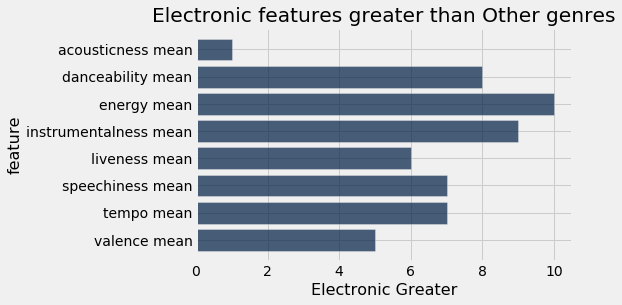

In [8]:
# Filter 'grouped_genre' table to only contain electronic features
electronic_features = grouped_genre.where("track_genre", "Electronic")
# Select only feature columns
electronic_features = electronic_features.drop('track_genre', 'track_id mean')

# Array to store the number of genres Electronic is greater than for each respective feature
num_greater = make_array()

# Append greater than counts to num_greater array
for label in electronic_features.labels:
    num_greater = np.append(num_greater,
                           np.count_nonzero(electronic_features.column(label).item(0) > grouped_genre.column(label)))

# Construct table containg feature labels and the respective number of genres Electronic is greater than
electronic_greater = Table().with_columns('feature', electronic_features.labels,                    
     'Electronic Greater', num_greater)

# Plots a horizontal bar chart of the data
electronic_greater.barh('feature', 'Electronic Greater')
plots.title("Electronic features greater than Other genres")

In order to determine potential unique features of Electronic tracks, we must look for relatively short and long bars in the bar chart. These "extreme" bars indicate that the features of Electronic tracks are significantly greater than or less than those of other genres.

From the bar chart, we can see that the acousticness, danceability, energy, and instrumentalness features of Electronic tracks all stand out. However, the only feature of Electronic tracks with a mean greater than those of all other genres is 'energy'.

**Quantitative Plot:**

Since we are only interested in whether the genre is Electronic, we made a *rename* function below to rename all genres which are not Electronic to "Other". We will then group by the renamed genres when performing A/B testing.

In [9]:
# Renames genres into "Electronic" or "Other"
def rename(genre):
    if genre != "Electronic":
        return "Other"
    return genre

The energy mean of the Electronic genre proved to be the highest among all genres in the dataset. We want to find out just how different the energy distributions are. In the following histogram, we will examine the differences in the distribution of the *energy* feature for the 'Electronic' genre and 'Other' genres.

Text(0.5, 1.0, 'Distribution of energy feature for Electronic and Other')

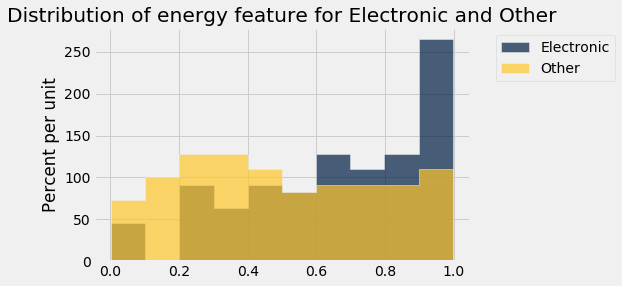

In [10]:
# Make a new table containing the renamed genres and the features
renamed_genre = track_features.with_columns(
                    "renamed_genre", track_features.apply(rename, "track_genre"))

# Obtain 'energy' values for 'Electronic' genre
electronic_energy = renamed_genre.where("renamed_genre", "Electronic").column("energy")

# Set the random seed so that we obtain the same samples from the "Other" genre, reproducible histogram
np.random.seed(16)

# Must limit number of samples from 'Other' genre to match number of samples from "Electronic" genre
sample_other = renamed_genre.where("renamed_genre", "Other").sample(len(electronic_energy),
                                                                          with_replacement=False)

# Obtain 'energy' for all 'Other' genres
other_energy = sample_other.column("energy")

# Graph overlayed histograms of 'energy' for the 'Electronic' genre and for 'Other' genres
energy = Table().with_columns("Electronic", electronic_energy,
                              "Other", other_energy)
energy.hist()
plots.title("Distribution of energy feature for Electronic and Other")

The distribution of *energy* for Other genres is more or less uniform across the graph. The distribution of *energy* for the Electronic genre is skewed left with a mode at its far right. The histogram shows how the electronic genre contains mostly tracks that have higher energy scores relative to other genres.

## Hypothesis Testing

**Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells. Also, be sure to
set a random seed so that your results are reproducible.**

Next, we apply hypothesis testing to determine whether this difference of Electronic tracks containing higher energy is statistically significant. This would indicate whether there is a relationship between the energy feature and whether the genre is Electronic.

Therefore, our null hypothesis is that there is no relationship between any of the features and whether the genre is Electronic. Our alternative hypothesis is that there is a relationshp between at least one feature (energy) and whether the genre is Electronic.

We use A/B testing as our procedure because we are evaluating the association between a numerical variable and a binary categorical variable (how does the energy feature change if Electronic or not Electronic). The test statistic is the difference of *energy* means between the *Electronic* genre and *Other* genres. So, the larger the magnitude of the statistic, the more it favors the alternative hypothesis. We decided on a significance cutoff of 5% (p = 0.05).

In the test statistic function below, we first grouped by the original genres, then we grouped again by the renamed genres. The purpose of this is to compensate for the unequal sample sizes between the genres, as noted in our Aggregated Data Table section of our report. If we only group by the renamed genres, the aggregated mean for the *Other* genre will be skewed towards the more common genres in the dataset (ie. Rock). On the other hand, grouping by the original genres first gives each genre equal weighting for when we group again by the *Other* genre. However, this does not remedy the inaccuracy of the genres due a significantly low sample size.

In [11]:
# Returns the difference between the means of two columns
def difference_of_means(table, label, group_label):
    # Select desired label
    filtered_table = table.select(group_label, label)
    
    # Group table by inputted label, aggregated by taking the mean
    means_table = filtered_table.group(group_label, np.mean)

    # Construct new table with renamed genres and the desired label
    group_renamed = Table().with_columns("renamed_genre", means_table.apply(rename, group_label),
                                        label, means_table.column(1))

    # Group tracks by "Electronic" and "Other" genres, aggregated by taking the mean
    binary_genre = group_renamed.group("renamed_genre", np.mean)

    # Obtain array containing means of label
    means = binary_genre.column(1)

    # Return difference between means of the two groups
    return means.item(0) - means.item(1)

In [12]:
# Returns the difference between the means of two groups formed by randomly shuffling all the labels
def one_simulated_difference(table, label, group_label):
    # Obtain array containing shuffled group labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # Construct new table containing unshuffled labels but shuffled group labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    # Return the the difference of means with the shuffled labels
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

We calculated 5000 simulations of the difference in energy means under then null hypothesis

In [13]:
# Set the random seed so that the histogram and p-value are reproducible
np.random.seed(4429)

# Calculates the simulated test statistic for each repetition and stores in 'differences' array
differences = make_array()
repetitions = 5000

for i in np.arange(repetitions):
    new_difference = one_simulated_difference(track_features, 'energy', 'track_genre')
    differences = np.append(differences, new_difference)
differences

array([-0.03086453, -0.03534689, -0.01119632, ...,  0.02140291,
       -0.04628112,  0.03343805])

The histogram below shows the distribution of the differences in means under the null hypothesis that there is no relationship between the Energy feature and whether a track is Electronic.

We see how the observed test statistic is not remotely close to the distribution of the null hypothesis, concluding that the actual distribution is different.

Observed Test Statistic: 0.2920545631557419


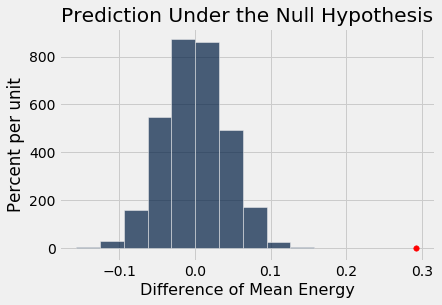

In [14]:
# Plots histogram of simulated test statistics
Table().with_column('Difference Between Group Means', differences).hist()
plots.title('Prediction Under the Null Hypothesis')
plots.xlabel("Difference of Mean Energy")

# Calculates the obeserved test statistic
observed_difference = difference_of_means(track_features, 'energy', 'track_genre')

# Plots a point on the histogram representing the observed test statistic
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2);

print('Observed Test Statistic:', observed_difference)

In [15]:
# Calculates the p-value by taking the number of simulated test statistics
# that equal or exceed the obeserved test statistic divided by the number of repetitions
p_value = np.count_nonzero(differences >= observed_difference) / repetitions
p_value

0.0

The proportion of data which is greater than or equal to the observed test statistic is 0, which is less than our significance cutoff of 0.05. This reveals that the distributions of the energy feature between *Electronic* and *Other* are not the same.

Therefore, the result is inconsistent with the null hypothesis, and therefore accepting the alternative hypothesis. Since the electronic genre has significantly lower energy compared to the other genres, there is sufficient evidence that there is a relationship between at least one feature (energy) and whether the genre is Electronic.

## Prediction

**Be sure to set a random seed so that your results are reproducible.**

In our hypothesis testing, we observed how there is a significant difference between the energy feature of Electronic music and other music. Additionally, we will develop a classifier to evaluate how well these unique features, like energy, determine whether a track is Electronic.

The prediction method we will use is k-Nearest Neighbors because we are working with a categorical dependent variable. Linear regression requires a continuous dependent variable. We will split the renamed_genre table into training and testing datasets. By comparing the features of the training data to those of a test row, we are able to find its nearest neighbors and the most common genre. We then test the accuracy of our classifier by dividing the number of genres identified correctly by the total number of tracks in the test set.

In [16]:
# Set the random seed so that the train and test datasets and accuracy are reproducible
np.random.seed(4429)

# Shuffles the table by resampling
shuffled_table = renamed_genre.sample(with_replacement = False)

# 80:20 split for training and test datasets
train = shuffled_table.take(np.arange(367))
test = shuffled_table.take(np.arange(367,459))

# Returns the Euclidean distance of two arrays
def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2)**2))

# Converts the row of a table into an array
def row_to_array(row, features):
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

# Classifies the genre of a track from the test set using the given features
def classify(row, features):
    # Convert test row into an array
    test_row_features_array = row_to_array(row, features)
    
    # Calculate distances between the features of the test row to each training row
    distances = make_array()
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances = np.append(distances, row_distance)
        
    # Append distances to the train dataset so we can examine their respective genres
    train_with_distances = train.with_column("Distance", distances)
    
    # Obtain three nearest neighbors
    nearest_neighbors = train_with_distances.sort("Distance").take(np.arange(3))
    
    # Identify most common genre
    most_common_label = nearest_neighbors.group('renamed_genre').sort('count').column(0).item(0)
    return most_common_label

We defined two functions below to compare the accuracy of our classifier using just the energy feature versus using the acousticness, danceability, energy and instrumentalness features.

In [17]:
def energy_classify(row):
    return classify(row, make_array('energy'))

def features_classify(row):
    features = make_array("acousticness", "danceability", "energy", 
                          "instrumentalness")
    return classify(row, features)

# Obtain prediction of each row in the test set using only energy feature
energy_prediction = test.with_column("prediction", test.apply(energy_classify))
# Number of predictions correct
energy_labels_correct = np.count_nonzero(energy_prediction.column("prediction") == test.column("renamed_genre"))
# Calculate accuracy by dividing the number of genres identified correctly by the total number of tracks in the test set
energy_accuracy = energy_labels_correct/energy_prediction.num_rows
print("The accuracy of our classifier using only energy as our feature is:", energy_accuracy)

# Calculate accuracy same as above but using the four features
test_with_prediction = test.with_column("prediction", test.apply(features_classify))
labels_correct = np.count_nonzero(test_with_prediction.column("prediction") == test.column("renamed_genre"))
accuracy = labels_correct/test_with_prediction.num_rows
print("The accuracy of our classifier using acousticness, danceability, energy and instrumentalness as our features is:", accuracy)

The accuracy of our classifier using only energy as our feature is: 0.5543478260869565
The accuracy of our classifier using acousticness, danceability, energy and instrumentalness as our features is: 0.8260869565217391


Although the energy of Electronic music is significantly different from that of other genres, our classifier only had an accuracy of 55% when only using energy as the feature. This is not much better than guessing the genre.

Therefore, we also included other features that stood out in our Qualitative Plot: acousticness, danceability, energy and instrumentalness. These features had relatively low or high means for the Electronic among all genres. This increased the accuracy of our classifier to 83%.

As a result, the energy feature alone is not sufficient to accurately predict whether a track is Electronic. However, the four features fit the data well and can be used to distinguish Electronic music. 

Moreover, we are not confident in using the classifier to predict the outcome of new data points. Despite the high accuracy with the test set, there might be bias in how the original datasets were gathered. More importantly, a significant number (47%) of our tracks were Rock, so we cannot be confident in predicting the outcome for genres with smaller sample sizes (since they are not representative in the test set). 

## Conclusion

To conclude, our research report identifies whether track features were associated with whether the genre is Electronic, which we found true with the energy feature through A/B testing. The Electronic genre had a larger energy feature than any other genres on average. However, this relationship does not mean that there is necessarily an association between energy and each of the other genres. In turn, we were able to produce a classifier with 55% accuracy considering only the energy feature, whereas we can accurately determine (83%) the genre using the four features: acousticness, danceability, energy, and instrumentalness. 

Since this dataset was a subset of a larger one, there could be potential biases especially in the variety and choice of tracks/genres (doesn't seem to be random based on count of each genre). Additionally, the unqual number of tracks available per genre potentially skewed our results (ie. prediction method mainly classified the Rock genre and not others). There also seems to be counfounding factors as indicated by our mediocre accuracy, so we must also consider other variables like track duration.


## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

**Link:** https://www.youtube.com/watch?v=IcKqHfWL12Q

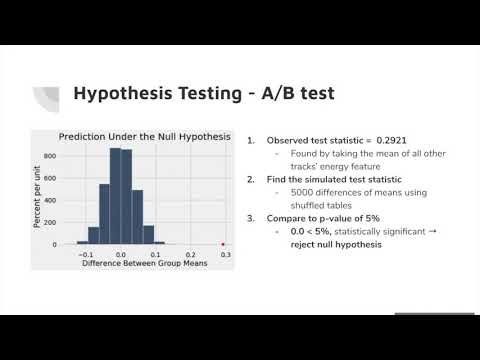

In [20]:
# Full Link: https://www.youtube.com/watch?v=IcKqHfWL12Q
# Plug in string between "v=" and ""&feature":
YouTubeVideo('IcKqHfWL12Q')

# Submission

*Just as with the other assignments in this course, please submit your research notebook to Okpy. We suggest that you
submit often so that your progress is saved.*

In [21]:
# Run this line to submit your work
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'music-final-project.ipynb'.
Submit... 100% complete
Submission successful for user: tarususu.t3@berkeley.edu
URL: https://okpy.org/cal/data8/su20/music/submissions/rmWkmw

